In [2]:
from indecision_rs import particle, simulate
from matplotlib import pyplot as plt
from tqdm import tqdm # Progress bars
import numpy as np

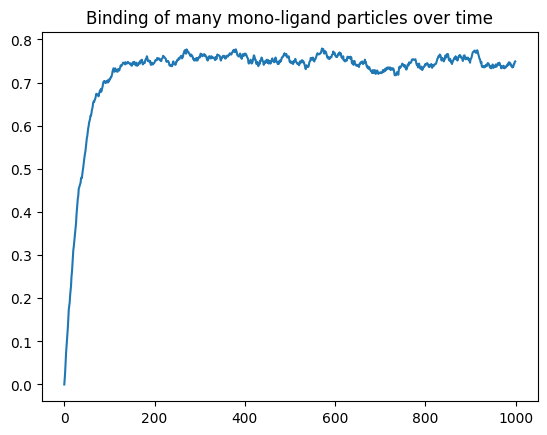

In [3]:
p = particle.MonoLigand(
    receptor_density=0.3,
    binding_strength=10.0,
    on_rate=1.0,
    off_rate=1.0,
)

simulation = p.simulate_many(1000)
simulation.advance_until(10.0)

thetas = simulation.thetas(samples=1000)

plt.title("Binding of many mono-ligand particles over time")
plt.plot(thetas)

In [4]:
# receptor_densities = np.linspace(0.0001, 1.0, num=100)
receptor_densities = np.logspace(-4.0, 0.0, num=100)
# print(receptor_densities)

N = 10_000
data = {}
for binding_strength in tqdm(np.linspace(1.0, 20.0, 5)):
    thetas = []
    for rd in receptor_densities:
        p = particle.MonoLigand(
            receptor_density=rd,
            binding_strength=binding_strength,
            on_rate=0.1,
            off_rate=0.1,
        )
        
        simulation = p.simulate_many(N)
        simulation.advance_until(100.0)
        
        theta = simulation.last_theta()
        thetas.append(theta)

    data[binding_strength] = thetas

100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.57it/s]


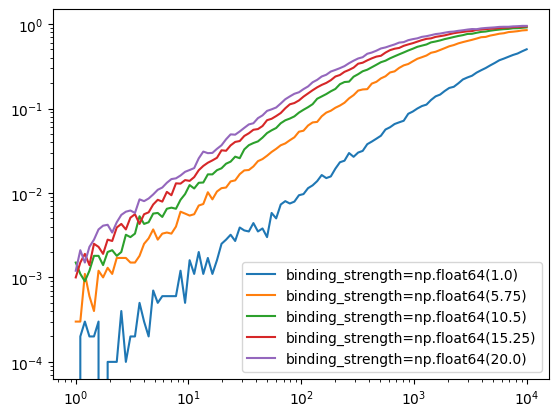

In [21]:
plt.xscale('log')
plt.yscale('log')
for binding_strength, thetas in data.items():
    plt.plot(receptor_densities * N, thetas, label=f"{binding_strength=}")

plt.legend()
plt.show()